# Model1

## Data


In [ ]:


# submersible
M_empty = 9000  # kg
length = 6.5  # m
width = 3.27  # m
height = 2.14  # m

## Pressure & Density


In [5]:
def ini_density(s, t):
    def reference_density(t):
        a0_star = 999.842594
        a1 = 6.793952e-02
        a2 = -9.095290e-03
        a3 = 1.001685e-04
        a4 = -1.120083e-06
        a5 = 6.536332e-09

        return a0_star + a1*t + a2*t**2 + a3*t**3 + a4*t**4 + a5*t**5

    b0 = 8.24493E-1
    b1 = -4.0899E-3
    b2 = 7.6438E-5
    b3 = -8.2467E-7
    b4 = 5.3875E-9

    c0 = 5.72466E-3
    c1 = 1.0227E-4
    c2 = -1.6546E-6

    d0 = 4.8314E-4

    rho_w_star = reference_density(t)

    return rho_w_star + (b0 + b1*t + b2*t**2 + b3*t**3 + b4*t**4) * s \
        + (c0 + c1*t + c2*t**2) * s**(3/2) \
        + d0 * s**2


def k_sbm(s, t, p):
    def k_st0(s, t):
        def k_w(t):
            e0 = 19652.21
            e1 = 148.4206
            e2 = -2.327105
            e3 = 0.01360477
            e4 = -0.00005155288

            # Calculate K_w using the provided equation
            K_w = e0 + e1 * t + e2 * t**2 + e3 * t**3 + e4 * t**4

            return K_w

        f0 = 54.6746
        f1 = -0.603459
        f2 = 1.09987E-02
        f3 = -6.16700E-05

        g0 = 7.944E-02
        g1 = 1.64830E-02
        g2 = -5.30900E-04

        K_w = k_w(t)
        K0 = K_w + (f0 + f1 * t + f2 * t**2 + f3 * t**3) * \
            s + (g0 + g1 * t + g2 * t**2)**(3/2)

        return K0

    def calc_A(s, t):
        def calc_A_w(t):
            h0 = 3.239908
            h1 = 1.43713E-3
            h2 = 1.16092E-4
            h3 = -5.77905E-7

            A_w = h0 + h1 * t + h2 * t**2 + h3 * t**3

            return A_w

        i0 = 2.2838E-3
        i1 = -1.0981E-5
        i2 = -1.6078E-6
        j0 = 1.91075E-4

        A = calc_A_w(t) + (i0 + i1 * t + i2 * t**2) * s + j0 * s**(3/2)

        return A

    def calc_B(s, t):
        def calc_B_w(t):
            k0_star = 8.50935E-5
            k1 = -6.12293E-6
            k2 = 5.2787E-8

            B_w = k0_star + k1 * t + k2 * t**2

            return B_w

        m0 = -9.9348E-7
        m1 = 2.0816E-8
        m2 = 9.1697E-10

        B = calc_B_w(t) + (m0 + m1 * t + m2 * t**2) * s

        return B

    K = k_st0(s, t) + calc_A(s, t)*p + calc_B(s, t)*p**2
    return K


# USE THIS to calculate density
def density(s, t, p):
    return ini_density(s, t)/(1-p/k_sbm(s, t, p))

1042.6008975527384


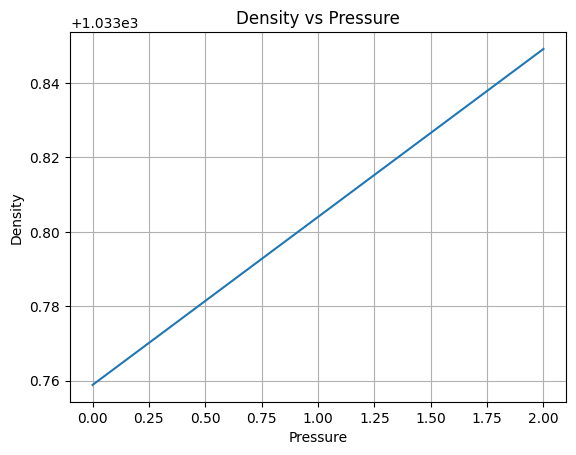

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'density' is your function that takes s, t, and p,
# and returns the density value, it should be defined somewhere in your code.
# For example:
# def density(s, t, p):
#     return <your formula here>

# Set specific values for s and t
s = 40
t = 10

# Create an array of pressure values over which you want to evaluate the density function
pressure_values = np.linspace(0, 2, 1000)

# Calculate density for each pressure value
density_values = [density(s, t, p) for p in pressure_values]

# Plot density vs pressure
plt.plot(pressure_values, density_values)
plt.xlabel('Pressure')
plt.ylabel('Density')
plt.title('Density vs Pressure')
plt.grid(True)
plt.show()

## Submersible


In [ ]:
import numpy as np

# the equivalent radius of streamline cylinder
R_cy = np.sqrt(width*height)